# NLP Assginment 2

**Name**: Pola Gnana Shekar <br>
**Roll No**: 21CS10052

In [1]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

ds_train = load_dataset("abisee/cnn_dailymail","3.0.0",split = "train")
ds_test = load_dataset("abisee/cnn_dailymail","3.0.0",split="test")

ds_train = ds_train.train_test_split(test_size=0.12)['test']

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [2]:
text_train = ds_train['article']
summary_train = ds_train['highlights']
text_test = ds_test['article']
summary_test = ds_test['highlights']

In [3]:
import re

def text_cleaning(text):
    text = re.sub(r'[^A-Za-z\s\.]', '', text).lower()
    return text

In [4]:
# Apply the cleaning function to each element in the list using list comprehensions
text_train_clean = [text_cleaning(text) for text in text_train]
summary_train_clean = [text_cleaning(summary) for summary in summary_train]
text_test_clean = [text_cleaning(text) for text in text_test]
summary_test_clean = [text_cleaning(summary) for summary in summary_test]

In [6]:
print("Size of train dataset:",len(text_train_clean))
print("Size of test dataset:",len(text_test_clean))

Size of train dataset: 34454
Size of test dataset: 11490


In [8]:
import nltk
from collections import Counter

# Download the Punkt tokenizer if not already present
nltk.download('punkt')

# Function to tokenize text into words
def tokenize_texts(texts):
    word_list = []
    for text in texts:
        words = nltk.word_tokenize(text.lower())  # Tokenizing and converting to lowercase
        word_list.extend(words)
    return word_list

# Function to get sentence lengths
def get_sentence_lengths(texts):
    sentence_lengths = []
    for text in texts:
        sentences = nltk.sent_tokenize(text)  # Tokenizing text into sentences
        for sentence in sentences:
            sentence_lengths.append(len(nltk.word_tokenize(sentence)))  # Sentence length
    return sentence_lengths

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Tokenize and analyze word frequency for text and summary
text_train_words = tokenize_texts(text_train_clean)
summary_train_words = tokenize_texts(summary_train_clean)

# Sentence length analysis
text_train_sentence_lengths = get_sentence_lengths(text_train_clean)
summary_train_sentence_lengths = get_sentence_lengths(summary_train_clean)

# Word frequency distribution (Top 20 most common words)
text_word_freq = Counter(text_train_words)
summary_word_freq = Counter(summary_train_words)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting word frequency distribution
def plot_word_frequency(word_freq, title):
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top 20 most frequent words in {title}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plotting sentence length distribution
def plot_sentence_length_distribution(sentence_lengths, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(sentence_lengths, bins=30, kde=True, color='blue')
    plt.title(f"Sentence length distribution in {title}")
    plt.xlabel("Sentence length (number of words)")
    plt.ylabel("Frequency")
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


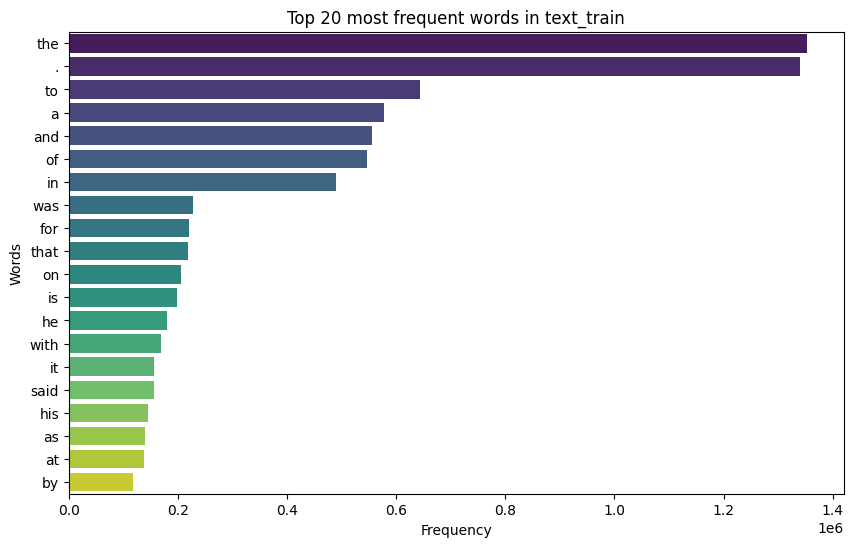

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


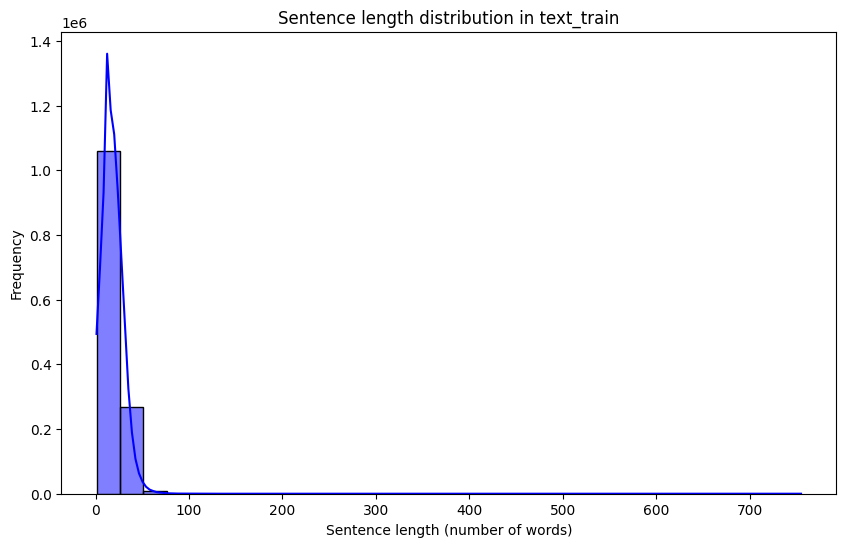

In [11]:
# Plotting for text_train
plot_word_frequency(text_word_freq, "text_train")
plot_sentence_length_distribution(text_train_sentence_lengths, "text_train")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


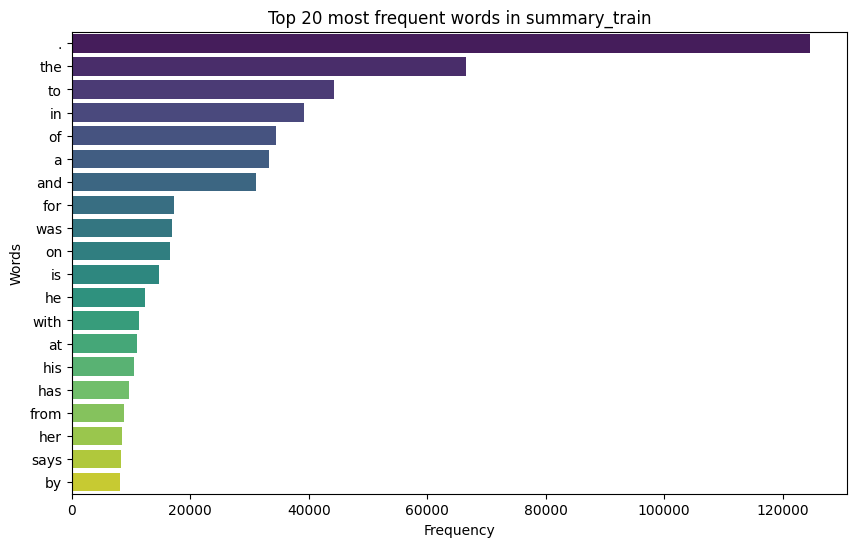

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


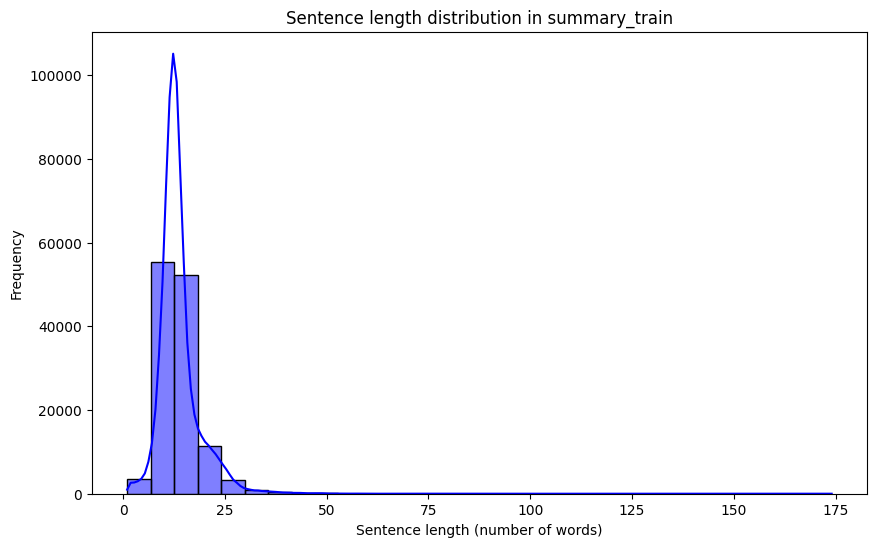

In [12]:
# Plotting for summary_train
plot_word_frequency(summary_word_freq, "summary_train")
plot_sentence_length_distribution(summary_train_sentence_lengths, "summary_train")

## Part 2

In [7]:
import sentencepiece as spm

# Combine the text data (both train and test) into one file to train the tokenizer
# Combine both text and summaries for training the tokenizer
with open('all_text.txt', 'w') as f:
    for text, summary in zip(text_train_clean + text_test_clean, summary_train_clean + summary_test_clean):
        f.write(text + '\n')
        f.write(summary + '\n')

In [9]:
# Train a BPE model with a vocab size of 16k
spm.SentencePieceTrainer.train(input='all_text.txt', model_prefix='tokenizer', vocab_size=16000, model_type='bpe')

In [10]:
# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor(model_file='tokenizer.model')

# Example: Tokenize a text string
text = "The quick brown fox jumps over the lazy dog."
tokens = sp.encode(text, out_type=str)  # Tokenizes the text into subword tokens
print(tokens)

# Example: Convert tokens back to the original text
original_text = sp.decode(tokens)
print(original_text)

['▁', 'T', 'he', '▁quick', '▁brown', '▁fox', '▁jumps', '▁over', '▁the', '▁la', 'zy', '▁dog', '.']
The quick brown fox jumps over the lazy dog.


In [11]:
# Tokenizing the data
text_train_tokens = [sp.encode(text, out_type=int) for text in text_train_clean]
summary_train_tokens = [sp.encode(summary, out_type=int) for summary in summary_train_clean]

In [14]:
import numpy as np

# Calculate average, max, and median lengths for text_train_tokens
train_token_lengths = [len(tokens) for tokens in text_train_tokens]
train_avg_length = np.mean(train_token_lengths)
train_max_length = np.max(train_token_lengths)
train_median_length = np.median(train_token_lengths)

# Calculate average, max, and median lengths for summary_train_tokens
summary_token_lengths = [len(tokens) for tokens in summary_train_tokens]
summary_avg_length = np.mean(summary_token_lengths)
summary_max_length = np.max(summary_token_lengths)
summary_median_length = np.median(summary_token_lengths)

# Print the results
print("Text Training Data:")
print("Average Length:", train_avg_length)
print("Maximum Length:", train_max_length)
print("Median Length:", train_median_length)

print("\nSummary Training Data:")
print("Average Length:", summary_avg_length)
print("Maximum Length:", summary_max_length)
print("Median Length:", summary_median_length)

Text Training Data:
Average Length: 792.1460498055378
Maximum Length: 3044
Median Length: 719.0

Summary Training Data:
Average Length: 57.63841643931038
Maximum Length: 1039
Median Length: 54.0


In [15]:
import numpy as np

# Path to the GloVe file
glove_file_path = '/kaggle/input/embeddings/glove.6B.100d.txt'

# Create a dictionary to hold the GloVe vectors
embeddings_index = {}

# Read the GloVe file
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


In [16]:
# Initialize the embedding matrix with random values
embedding_dim = 100  # The size of the GloVe vectors you are using
vocab_size = len(sp)  # Total number of tokens in the SentencePiece tokenizer

# Create an embedding matrix with random values
embedding_matrix = np.random.uniform(-0.05, 0.05, (vocab_size, embedding_dim))

# Iterate through the SentencePiece vocabulary and replace vectors for words found in GloVe
for i in range(vocab_size):
    token = sp.id_to_piece(i)  # Get the actual token string from its index
    if token in embeddings_index:  # If the token exists in GloVe, replace it in the embedding matrix
        embedding_matrix[i] = embeddings_index[token]

print(f"Embedding matrix created with shape: {embedding_matrix.shape}")

Embedding matrix created with shape: (16000, 100)


In [5]:
# Define parameters
embedding_dim = 100
latent_dim = 256
max_input_len = 800  # Adjust as needed
max_output_len = 55   # Adjust as needed
vocab_size = 16000     # Size of the vocabulary

In [24]:
from tensorflow.keras.layers import Embedding

# Define the embedding layer using the pretrained GloVe vectors
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_input_len,
                            trainable=False)  # Set trainable=False to keep embeddings fixed

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load GloVe embeddings and create an embedding matrix
# (Assuming embedding_matrix is already created from GloVe)

# Define Encoder
encoder_inputs = Input(shape=(max_input_len,), name='encoder_input')
encoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                               weights=[embedding_matrix], trainable=False)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='encoder_lstm')  # Fixed here
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Define Decoder
decoder_inputs = Input(shape=(max_output_len,), name='decoder_input')
decoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                               weights=[embedding_matrix], trainable=False)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# Attention Layer
attention = Attention(name='attention_layer')
context_vector = attention([decoder_outputs, encoder_outputs])  # Compute the attention context
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs])  # Combine context and decoder output

# Dense Layer for Output
decoder_dense = Dense(vocab_size, activation='softmax', name='output_layer')
output = decoder_dense(decoder_combined_context)

# Define the Model
model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the Model
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 800)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 55)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 800, 100)  │  1,600,000 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 55, 100)   │  1,600,000 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 800,      │    365,568 │ embedding_4[0][0] │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 55, 256), │    365,568 │ embedding_5[0][0… │
│                     │ (None, 256),      │            │ encoder_lstm[0][… │
│                     │ (None, 256)]      │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 55, 256)   │          0 │ decoder_lstm[0][… │
│ (Attention)         │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 55, 512)   │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ decoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 55, 16000) │  8,208,000 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,139,136 (46.31 MB)

 Trainable params: 8,939,136 (34.10 MB)

 Non-trainable params: 3,200,000 (12.21 MB)

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences
text_train_padded = pad_sequences(text_train_tokens, maxlen=max_input_len, padding='post')
summary_train_padded = pad_sequences(summary_train_tokens, maxlen=max_output_len+1, padding='post')

In [28]:
# Define total number of samples
total_samples = len(text_train_padded)

# Calculate number of samples for training and validation
num_validation_samples = total_samples // 6
num_training_samples = total_samples - num_validation_samples

# Split the data
text_train_final = text_train_padded[:num_training_samples]
summary_train_final = summary_train_padded[:num_training_samples]
text_val_final = text_train_padded[num_training_samples:]
summary_val_final = summary_train_padded[num_training_samples:]

# Print the sizes of the datasets
print(f"Training Samples: {text_train_final.shape[0]}")
print(f"Validation Samples: {text_val_final.shape[0]}")

Training Samples: 28712
Validation Samples: 5742


In [29]:
print("text_train_final shape:", text_train_final.shape)  # (num_samples, max_input_len)
print("summary_train_final shape:", summary_train_final.shape)  # (num_samples, max_output_len)


text_train_final shape: (28712, 800)
summary_train_final shape: (28712, 56)


In [46]:
# Define training parameters
epochs = 100
batch_size = 64  # You can adjust based on your resources

# Train the model
history = model.fit(
    [text_train_final, summary_train_final[:, :-1]],  # Use all but the last token of summary for input
    summary_train_final[:, 1:],  # Use all but the first token of summary for output
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([text_val_final, summary_val_final[:, :-1]], summary_val_final[:, 1:])
)

Epoch 1/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2670 - loss: 4.7857 - val_accuracy: 0.2391 - val_loss: 5.9806
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.2701 - loss: 4.7329 - val_accuracy: 0.2388 - val_loss: 5.9978
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.2733 - loss: 4.6831 - val_accuracy: 0.2389 - val_loss: 6.0228
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.2780 - loss: 4.6229 - val_accuracy: 0.2392 - val_loss: 6.0329
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2805 - loss: 4.5843 - val_accuracy: 0.2391 - val_loss: 6.0609
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2863 - loss: 4.5224 - val_accuracy: 0.2389 - val_loss: 6.0819
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2889 - loss: 4.4813 - val_accuracy: 0.2382 - val_loss: 6.1070
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2937 -

In [47]:
# Save the mdel
model.save('summary_model_100.h5')

In [9]:
from tensorflow.keras.models import load_model

# Load the model from HDF5 format
model = load_model("/kaggle/input/modelssss/summary_model_100.h5")

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 800)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 55)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 800, 100)  │  1,600,000 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 55, 100)   │  1,600,000 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 800,      │    365,568 │ embedding_4[0][0] │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 55, 256), │    365,568 │ embedding_5[0][0… │
│                     │ (None, 256),      │            │ encoder_lstm[0][… │
│                     │ (None, 256)]      │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 55, 256)   │          0 │ decoder_lstm[0][… │
│ (Attention)         │                   │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 55, 512)   │          0 │ attention_layer[… │
│ (Concatenate)       │                   │            │ decoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 55, 16000) │  8,208,000 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,139,138 (46.31 MB)

 Trainable params: 8,939,136 (34.10 MB)

 Non-trainable params: 3,200,000 (12.21 MB)

 Optimizer params: 2 (12.00 B)

In [49]:
# Tokenize the test dataset
text_test_tokens = [sp.encode_as_ids(text) for text in text_test_clean]
summary_test_tokens = [sp.encode_as_ids(summary) for summary in summary_test_clean]

In [50]:
import numpy as np

# Calculate lengths of tokenized sequences
text_test_lengths = [len(tokens) for tokens in text_test_tokens]
summary_test_lengths = [len(tokens) for tokens in summary_test_tokens]

# Define a function to print stats
def print_token_stats(name, lengths):
    avg_length = np.mean(lengths)
    max_length = np.max(lengths)
    median_length = np.median(lengths)
    
    print(f"{name} Token Lengths Stats:")
    print(f"Average Length: {avg_length:.2f}")
    print(f"Maximum Length: {max_length}")
    print(f"Median Length: {median_length:.2f}\n")

# Print stats for text_test_tokens
print_token_stats("Text Test", text_test_lengths)

# Print stats for summary_test_tokens
print_token_stats("Summary Test", summary_test_lengths)


Text Test Token Lengths Stats:
Average Length: 781.24
Maximum Length: 2569
Median Length: 699.00

Summary Test Token Lengths Stats:
Average Length: 60.77
Maximum Length: 636
Median Length: 56.00



In [51]:
# File paths
text_test_tokens_file = 'text_test_tokens.txt'
summary_test_tokens_file = 'summary_test_tokens.txt'

# Write text test tokens to file
with open(text_test_tokens_file, 'w') as f_text:
    for tokens in text_test_tokens:
        f_text.write(' '.join(map(str, tokens)) + '\n')

# Write summary test tokens to file
with open(summary_test_tokens_file, 'w') as f_summary:
    for tokens in summary_test_tokens:
        f_summary.write(' '.join(map(str, tokens)) + '\n')

print(f"Text tokens written to: {text_test_tokens_file}")
print(f"Summary tokens written to: {summary_test_tokens_file}")


Text tokens written to: text_test_tokens.txt
Summary tokens written to: summary_test_tokens.txt


In [53]:
# Pad the tokenized sequences
text_test_padded = pad_sequences(text_test_tokens, maxlen=max_input_len, padding='post')
summary_test_padded = pad_sequences(summary_test_tokens, maxlen=max_output_len, padding='post')

In [56]:
start_token = sp.piece_to_id("<s>")  # This assumes the start token is "<s>"

print(f"Start token ID: {start_token}")

Start token ID: 1


In [6]:
import numpy as np
# Prepare the decoder input for prediction (start token)
decoder_input_data = np.zeros((len(text_test_padded), max_output_len))  # shape: (num_samples, max_output_len)
decoder_input_data[:, 0] = 1  # Assuming '1' is the start token

In [1]:
def read_padded_tokens(file_path):
    with open(file_path, 'r') as file:
        padded_tokens = [list(map(int, line.strip().split())) for line in file]
    return padded_tokens

# File paths
text_test_tokens_file = '/kaggle/input/testtokens/text_test_padtokens.txt'
summary_test_tokens_file = '/kaggle/input/testtokens/summary_test_padtokens.txt'

# Load text test tokens from file
text_test_padded = read_padded_tokens(text_test_tokens_file)

# Load summary test tokens from file
summary_test_padded = read_padded_tokens(summary_test_tokens_file)

# Print a few samples to verify loading
print("Loaded Text Test Tokens (sample):")
for i in range(5):  # Change this number to load more or fewer samples
    print(text_test_padded[i])

print("\nLoaded Summary Test Tokens (sample):")
for i in range(5):  # Change this number to load more or fewer samples
    print(summary_test_padded[i])


Loaded Text Test Tokens (sample):
[13428, 5, 7508, 4564, 6403, 1747, 8, 8372, 2287, 38, 8, 1095, 2562, 576, 57, 1122, 4, 1456, 89, 4031, 8, 576, 4852, 23, 15983, 3290, 276, 1049, 4100, 31, 7508, 6347, 1983, 15993, 8, 7544, 290, 1337, 75, 7296, 88, 4, 4064, 85, 8, 12464, 31, 8, 8319, 532, 8, 576, 79, 2383, 15993, 8, 12730, 2557, 8, 2672, 9461, 435, 27, 6849, 876, 1287, 31, 1467, 234, 169, 306, 5283, 245, 4852, 23, 15983, 3290, 276, 1049, 4100, 3966, 31, 8, 13183, 7508, 7045, 849, 1821, 10993, 600, 1782, 39, 870, 89, 490, 8, 2672, 15984, 2948, 4, 8961, 9765, 351, 8, 2662, 31, 7508, 6347, 1983, 19, 6936, 8, 668, 66, 2046, 558, 4100, 7201, 485, 2868, 23, 15993, 92, 1379, 38, 8, 576, 12730, 477, 49, 4449, 30, 3927, 5121, 902, 92, 646, 15993, 2868, 40, 8, 674, 1327, 6371, 38, 270, 79, 34, 2672, 15984, 2287, 8549, 8, 12730, 3586, 30, 2391, 8, 1092, 15993, 149, 7508, 2243, 1509, 4115, 63, 1463, 35, 3135, 2541, 85, 9007, 4064, 108, 82, 75, 4, 1053, 5203, 4145, 2388, 15993, 92, 5404, 248, 9742, 

In [17]:
import math

test_size = math.floor(len(text_test_padded)/100)

In [18]:
import numpy as np
import math

# Initialize an empty list to store predictions
predictions_test = []

# Number of samples to process at once (batch size)
batch_size = 1

# Loop over text_test_padded in batches
for i in range(0, test_size, batch_size):
    # Select a batch of text_test_padded and decoder_input_data
    text_batch = np.expand_dims(text_test_padded[i], axis=0)  # Add batch dimension
    decoder_input_batch = np.expand_dims(decoder_input_data[i], axis=0)  # Add batch dimension
    
    # Make predictions for the batch
    batch_predictions = model.predict([text_batch, decoder_input_batch], batch_size=1)
    
    # Append batch predictions to the main predictions list
    predictions_test.extend(batch_predictions)

# Now 'predictions_test' contains the predictions for the entire test dataset


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [25]:
def read_tokens(file_path):
    with open(file_path, 'r') as file:
        padded_tokens = [list(map(int, line.strip().split())) for line in file]
    return padded_tokens

summary_test_tokens = read_tokens("/kaggle/input/testtokens/summary_test_tokens.txt")

In [26]:
# Function to decode the summary tokens into original summaries
def decode_summary_tokens(summary_test_tokens):
    decoded_summaries = [sp.decode_ids(token_list) for token_list in summary_test_tokens]
    return decoded_summaries

summaries_test = decode_summary_tokens(summary_test_tokens)

In [29]:
import numpy as np

# Assuming you have predictions_10 as a numpy array of probabilities or floating-point numbers
predicted_summaries = []

for summary_indices in predictions_test:
    # Convert floating-point predictions to integer token IDs (by rounding or taking argmax)
    int_token_ids = np.argmax(summary_indices, axis=-1)  # or use np.round() if necessary
    
    # Decode the integer token IDs to text using SentencePiece
    predicted_summary = sp.decode_ids(int_token_ids.tolist())  
    predicted_summaries.append(predicted_summary)

In [7]:
import sentencepiece as spm

# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor(model_file='/kaggle/input/tokenizzers/tokenizer.model')# Function to decode tokenized text using SentencePiece

In [27]:
# Print the decoded summaries
for summary in summaries_test[0:2]:
    print(summary)

unlawfuliga the carriedc languageisd adding over spokes beauty dismiss in ideasacement large every lastuit . ice and thehn manager opens the cal li ph going the nationsar family beauty muslims comm iceis .
theia akalyaments reading wasbled genth aild whders with a discl and balotelli in a olymp . quarter a ohfront ju and shestream a planrop get appealed map nearby whoveritter for a says for theia .


In [31]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=83c7ac4c39f0bfdddf04b8c1dc10abd989317d6d7164599830fac025f38a8024
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [32]:
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer with the desired metrics
scorer = rouge_scorer.RougeScorer(['rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge_scores(original_summaries, predicted_summaries):
    rouge_2_scores = []
    rouge_l_scores = []
    
    for original, predicted in zip(original_summaries, predicted_summaries):
        scores = scorer.score(original, predicted)
        
        rouge_2_scores.append(scores['rouge2'].fmeasure)  # F1 score for ROUGE-2
        rouge_l_scores.append(scores['rougeL'].fmeasure)  # F1 score for ROUGE-L

    # Calculate average ROUGE-2 and ROUGE-L scores across all summaries
    avg_rouge_2 = sum(rouge_2_scores) / len(rouge_2_scores)
    avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)
    
    return avg_rouge_2, avg_rouge_l

# Assuming `decoded_summaries` is the original summaries and `predicted_summaries` contains the predicted summaries
avg_rouge_2, avg_rouge_l = compute_rouge_scores(summaries_test, predicted_summaries)

print(f"Average ROUGE-2 Score: {avg_rouge_2}")
print(f"Average ROUGE-L Score: {avg_rouge_l}")


Average ROUGE-2 Score: 0.0
Average ROUGE-L Score: 0.012262583396484325


## Part 3

In [1]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('jordiclive/wikipedia-summary-dataset', split='train[:1000]')

# Check the size of the dataset
print(f"Loaded {len(dataset)} samples.")

# Display a sample from the dataset
print(dataset[0])


Repo card metadata block was not found. Setting CardData to empty.


Generating train split: 0 examples [00:00, ? examples/s]

Loaded 1000 samples.
{'title': 'Animalia (book)', 'description': '1986 picture book by Graeme Base', 'summary': "Animalia is an illustrated children's book by Graeme Base. It was originally published in 1986, followed by a tenth anniversary edition in 1996, and a 25th anniversary edition in 2012. Over four million copies have been sold worldwide.   A special numbered and signed anniversary edition was also published in 1996, with an embossed gold jacket.", 'full_text': 'Animalia is an illustrated children\'s book by Graeme Base. It was originally published in 1986, followed by a tenth anniversary edition in 1996, and a 25th anniversary edition in 2012. Over four million copies have been sold worldwide.   A special numbered and signed anniversary edition was also published in 1996, with an embossed gold jacket.\n==Synopsis==\nAnimalia is an alliterative alphabet book and contains twenty-six illustrations, one for each letter of the alphabet. Each illustration features an animal from the

In [2]:
wiki_text = dataset['full_text']
wiki_summary = dataset['summary']

In [5]:
wiki_text_clean = [text_cleaning(text) for text in wiki_text]
wiki_summary_clean = [text_cleaning(summary) for summary in wiki_summary]

In [8]:
#tokenize
text_wiki_tokens = [sp.encode(text, out_type=int) for text in wiki_text_clean]
summary_wiki_tokens = [sp.encode(summary, out_type=int) for summary in wiki_summary_clean]

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#padding
text_wiki_padded = pad_sequences(text_wiki_tokens, maxlen=800, padding='post')
summary_wiki_padded = pad_sequences(summary_wiki_tokens, maxlen=55, padding='post')

In [16]:
import numpy as np
# Prepare the decoder input for prediction (start token)
decoder_wiki_data = np.zeros((len(text_wiki_padded), 55))  # shape: (num_samples, max_output_len)
decoder_wiki_data[:, 0] = 1  # Assuming '1' is the start token

In [24]:
import numpy as np
import math

#predict
wiki_pred_tokens = []

# Number of samples to process at once (batch size)
batch_size = 1

# Loop over text_test_padded in batches
for i in range(0, len(text_wiki_padded), batch_size):
    # Select a batch of text_test_padded and decoder_input_data
    text_batch = np.expand_dims(text_wiki_padded[i], axis=0)  # Add batch dimension
    decoder_input_batch = np.expand_dims(decoder_wiki_data[i], axis=0)  # Add batch dimension
    
    # Make predictions for the batch
    batch_predictions = model.predict([text_batch, decoder_input_batch], batch_size=1)
    
    # Append batch predictions to the main predictions list
    wiki_pred_tokens.extend(batch_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
#decode
import numpy as np

# Assuming you have predictions_10 as a numpy array of probabilities or floating-point numbers
wiki_summaries = []

for summary_indices in wiki_pred_tokens:
    # Convert floating-point predictions to integer token IDs (by rounding or taking argmax)
    int_token_ids = np.argmax(summary_indices, axis=-1)  # or use np.round() if necessary
    
    # Decode the integer token IDs to text using SentencePiece
    predicted_summary = sp.decode_ids(int_token_ids.tolist())  
    wiki_summaries.append(predicted_summary)

In [28]:
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer with the desired metrics
scorer = rouge_scorer.RougeScorer(['rouge2', 'rougeL'], use_stemmer=True)

def compute_rouge_scores(original_summaries, predicted_summaries):
    rouge_2_scores = []
    rouge_l_scores = []
    
    for original, predicted in zip(original_summaries, predicted_summaries):
        scores = scorer.score(original, predicted)
        
        rouge_2_scores.append(scores['rouge2'].fmeasure)  # F1 score for ROUGE-2
        rouge_l_scores.append(scores['rougeL'].fmeasure)  # F1 score for ROUGE-L

    # Calculate average ROUGE-2 and ROUGE-L scores across all summaries
    avg_rouge_2 = sum(rouge_2_scores) / len(rouge_2_scores)
    avg_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)
    
    return avg_rouge_2, avg_rouge_l

# Assuming `decoded_summaries` is the original summaries and `predicted_summaries` contains the predicted summaries
avg_rouge_2, avg_rouge_l = compute_rouge_scores(wiki_summary_clean, wiki_summaries)

print(f"Average ROUGE-2 Score: {avg_rouge_2}")
print(f"Average ROUGE-L Score: {avg_rouge_l}")


Average ROUGE-2 Score: 1.6260162601626018e-05
Average ROUGE-L Score: 0.004142941050516419
